<a href="https://colab.research.google.com/github/x1001000/Colab-Notebooks/blob/main/pandas.DataFrame.groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving eyeForm.db - 三總.csv to eyeForm.db - 三總.csv


In [ ]:
import pandas as pd
df = pd.read_csv(list(uploaded)[0], skiprows=2)[['性別', '實歲', '右眼軸長', '左眼軸長']].dropna()
df

,性別,實歲,右眼軸長,左眼軸長
0,男,6歲11月,25.46,25.13
1,男,7歲2月,25.48,25.20
2,男,7歲4月,25.56,25.26
3,女,7歲7月,23.66,23.50
5,女,8歲3月,24.00,23.77
...,...,...,...,...
3369,男,7歲3個月,24.46,24.48
3370,男,7歲8個月,24.60,24.61
3371,男,7歲8個月,24.66,24.63
3372,男,7歲7個月,23.87,23.76


In [ ]:
od = df.drop(columns='左眼軸長')
os = df.drop(columns='右眼軸長')
od.columns = ['性別', '實歲', '軸長']
os.columns = ['性別', '實歲', '軸長']
data = pd.concat([od, os])
data

,性別,實歲,軸長
0,男,6歲11月,25.46
1,男,7歲2月,25.48
2,男,7歲4月,25.56
3,女,7歲7月,23.66
5,女,8歲3月,24.00
...,...,...,...
3369,男,7歲3個月,24.48
3370,男,7歲8個月,24.61
3371,男,7歲8個月,24.63
3372,男,7歲7個月,23.76


In [ ]:
data = data.drop(data[data['軸長'] == '< 20'].index)
data = data.drop(data[data['軸長'] == '> 30'].index)
data

,性別,實歲,軸長
0,男,6歲11月,25.46
1,男,7歲2月,25.48
2,男,7歲4月,25.56
3,女,7歲7月,23.66
5,女,8歲3月,24.00
...,...,...,...
3369,男,7歲3個月,24.48
3370,男,7歲8個月,24.61
3371,男,7歲8個月,24.63
3372,男,7歲7個月,23.76


In [ ]:
age = data['實歲'].str.extract('(\d+)歲(\d+)')
age

,0,1
0,6,11
1,7,2
2,7,4
3,7,7
5,8,3
...,...,...
3369,7,3
3370,7,8
3371,7,8
3372,7,7


In [ ]:
data['實歲'] = age[0].astype(int) + (age[1].astype(int) >= 6).astype(int)
data['軸長'] = data['軸長'].astype(float)
data

,性別,實歲,軸長
0,男,7,25.46
1,男,7,25.48
2,男,7,25.56
3,女,8,23.66
5,女,8,24.00
...,...,...,...
3369,男,7,24.48
3370,男,8,24.61
3371,男,8,24.63
3372,男,8,23.76


In [ ]:
import numpy as np
def percentile(q):
    return lambda a: np.percentile(a, q)

In [ ]:
quartile = data.groupby(['性別', '實歲'])['軸長'].aggregate([percentile(25), percentile(75)])
IQR = quartile['<lambda_1>'] - quartile['<lambda_0>']
lower_fence = quartile['<lambda_0>'] - IQR * 1.5
upper_fence = quartile['<lambda_1>'] + IQR * 1.5

In [ ]:
for i in lower_fence.index:
    data.loc[(data['性別'] == i[0]) & (data['實歲'] == i[1]), 'lower_fence'] = lower_fence[i]
for i in upper_fence.index:
    data.loc[(data['性別'] == i[0]) & (data['實歲'] == i[1]), 'upper_fence'] = upper_fence[i]
data

,性別,實歲,軸長,lower_fence,upper_fence
0,男,7,25.46,20.73125,25.86125
1,男,7,25.48,20.73125,25.86125
2,男,7,25.56,20.73125,25.86125
3,女,8,23.66,20.99000,25.83000
5,女,8,24.00,20.99000,25.83000
...,...,...,...,...,...
3369,男,7,24.48,20.73125,25.86125
3370,男,8,24.61,21.36125,26.33125
3371,男,8,24.63,21.36125,26.33125
3372,男,8,23.76,21.36125,26.33125


In [ ]:
data_without_outliers = data[(data['軸長'] > data['lower_fence']) & (data['軸長'] < data['upper_fence'])]
data_without_outliers

,性別,實歲,軸長,lower_fence,upper_fence
0,男,7,25.46,20.73125,25.86125
1,男,7,25.48,20.73125,25.86125
2,男,7,25.56,20.73125,25.86125
3,女,8,23.66,20.99000,25.83000
5,女,8,24.00,20.99000,25.83000
...,...,...,...,...,...
3369,男,7,24.48,20.73125,25.86125
3370,男,8,24.61,21.36125,26.33125
3371,男,8,24.63,21.36125,26.33125
3372,男,8,23.76,21.36125,26.33125


In [ ]:
data_to_plot = data_without_outliers.groupby(['性別', '實歲'])['軸長'].aggregate([percentile(0), percentile(50), percentile(75), percentile(90), percentile(100)])
data_to_plot

<lambda_0>  <lambda_1>  <lambda_2>  <lambda_3>  <lambda_4>
性別 實歲                                                            
女  2        20.86      20.865     20.8675      20.869       20.87
   3        19.39      21.360     22.0600      22.632       23.29
   4        20.53      21.755     22.0725      22.541       23.11
   5        20.39      22.180     22.6425      23.000       23.41
   6        19.64      22.235     22.9625      23.430       24.57
   7        20.86      22.920     23.4500      24.032       24.84
   8        21.13      23.460     23.8600      24.522       25.54
   9        21.30      23.650     24.1000      24.838       25.74
   10       21.58      23.810     24.4550      24.670       25.34
   11       21.49      23.720     24.5200      25.008       25.73
   12       22.51      24.290     24.6050      25.061       25.31
   13       22.81      24.460     25.2325      25.750       27.01
   14       22.92      24.855     25.6550      25.932       26.20
   15       22.57      25.035     25.5325      26.087       26.44
   16       23.29      24.600     25.3250      25.840       26.54
   17       24.82      25.345     25.6850      25.895       26.01
   18       22.42      23.700     25.1400      25.806       26.25
   21       24.69      24.915     25.0275      25.095       25.14
男  2        21.88      22.040     22.1700      22.332       22.44
   3        20.99      22.475     23.2450      23.824       24.24
   4        20.29      22.130     22.6100      23.024       24.26
   5        20.71      22.690     23.3050      23.900       24.88
   6        20.33      22.680     23.5150      24.338       25.42
   7        21.10      23.390     23.9100      24.608       25.56
   8        21.45      23.960     24.4600      25.046       25.76
   9        22.45      24.215     24.5550      24.851       25.90
   10       21.99      24.455     25.0450      25.466       26.28
   11       22.36      24.510     25.1650      25.750       26.77
   12       23.33      24.650     25.1875      25.913       26.93
   13       23.26      24.760     25.1400      25.530       26.34
   14       23.21      24.820     25.1900      25.840       26.56
   15       23.54      24.840     25.0800      25.400       26.23
   16       22.40      25.410     26.6525      27.197       27.86
   17       26.55      27.010     27.4675      27.715       27.88
   18       25.46      25.695     25.8125      25.883       25.93

In [ ]:
import pickle
with open('data_to_plot.pkl', 'wb') as f:
    pickle.dump(data_to_plot, f)

In [ ]:
import matplotlib.pyplot as plt
def plot(sex):
    morf = data_to_plot.loc[sex].loc[3:16]
    MorF = {'男': 'Male', '女': 'Female'}[sex]
    plt.xticks(range(3, 17))
    plt.yticks(range(20, 30))
    plt.fill_between(morf.index, morf['<lambda_4>'], morf['<lambda_3>'], color='red', alpha=0.6, label='90~100%')
    plt.fill_between(morf.index, morf['<lambda_3>'], morf['<lambda_2>'], color='orange', alpha=0.6, label='75~90%')
    plt.fill_between(morf.index, morf['<lambda_2>'], morf['<lambda_1>'], color='yellow', alpha=0.6, label='50~75%')
    plt.fill_between(morf.index, morf['<lambda_1>'], morf['<lambda_0>'], color='lightgreen', alpha=0.6, label='0~50%')
    plt.legend(loc='lower right')
    plt.title(f'Axial Length Growth in {MorF} Taiwanese Children', fontsize=14)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Axial Length', fontsize=14)

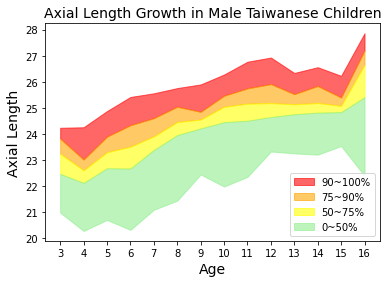

In [ ]:
plot('男')

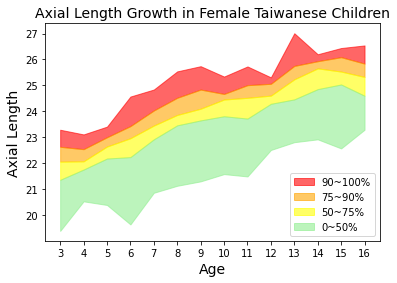

In [ ]:
plot('女')